# Exploratory Data Analysis using Python3

## Dataset -  [Automobile Data set](https://archive.ics.uci.edu/ml/datasets/automobile) (UCI Machine learning Repository)

### Abstract: 
From 1985 Ward's Automotive Yearbook

### Dataset Information:
This data set consists of three types of entities: 
- the specification of an auto in terms of various characteristics 
- its assigned insurance risk rating
- its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **symboling.** A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

### Attribute Information:

**Attribute: Attribute Range** 

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.


## Preliminary Step

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="ticks")

In [2]:
#Importing the Dataset
auto = pd.read_csv("...//data//input.csv")

In [3]:
#Displaying the first 5 datapoints
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Inference:** *From the inital look at the data, we can see that null values are represented as "?" in this dataset.*

In [4]:
#Checking the dimensions of the dataset
auto.shape

(205, 26)

In [5]:
#Looking at the datatypes of the features
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
#Getting the descriptive statistics of numeric columns
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
#Getting the descriptive statistics of numeric columns
auto.describe(include=[np.object])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


## Data Cleaning
From the preliminary look at the data, we know that there are missing values across diferent attributes in the dataset. So, we are gonna do imputation for those variables. 
We are replacing **?** with **NaN** because *Python3* recognises **NaN** as missing values by default. This step will enable to us to do an easy imputation.

In [8]:
#Replacing "?" with "NaN" from the numpy library
auto = auto.replace("?", np.NaN)

#Checking the missing values count by attributes
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Mode Imputation
Since, the num-of-doors vairable has only 2 unique values. We will use the value with the **highest mode** for imputation.

In [9]:
#Imputing the "num-of-doors" variable - mode imputation
auto['num-of-doors'] = auto['num-of-doors'].fillna("four")

### Mean Imputation
We will use **mean imputation** for the other vairables (numerical) with missing values. 

In [10]:
#Imputing the variables having missing values - Mean Imputation
#Using "scikit-learn" library of Python

#Defining the imputation strategy and creating an instance
imp = Imputer(missing_values="NaN", strategy="mean")

#Running a 'for' loop to impute the variables containing missing values
for i in auto.columns:
    if auto[i].isnull().sum() > 0:
        auto[i] = imp.fit_transform(auto[[i]])


In [11]:
#Checking - if the variables are imputed
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Univariate Analysis

### Vehicle Make  - Frequency Plot

Text(0.5,0,'Count')

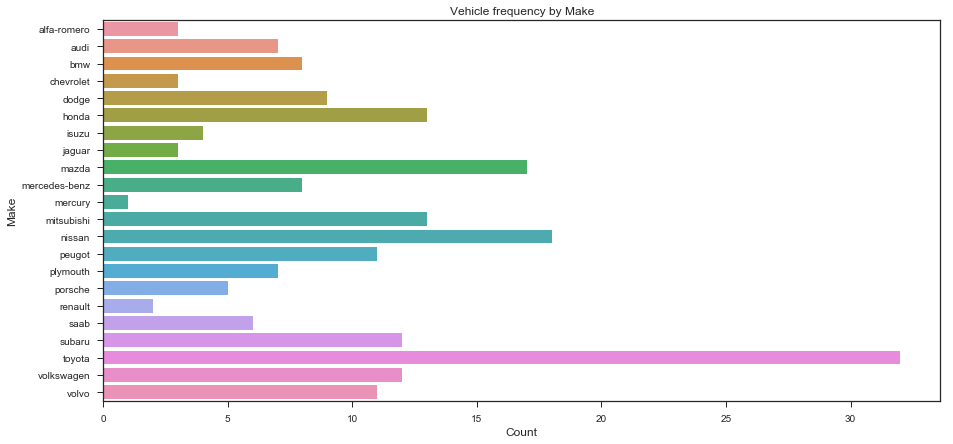

In [12]:
#Setting the plot parameters
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})

#Vehicle Make - Frequency Plot
f, axis = plt.subplots(figsize=(15, 7))
sns.countplot(y='make', data=auto)
plt.title("Vehicle frequency by Make")
plt.ylabel('Make')
plt.xlabel('Count')

**Inference:** *Toyota manufacturer has most number of vehicles with more than 40% than the 2nd highest maker Nissan. Mazda comes in as the 3rd highest make.*

### Fuel Type - Frequency Plot

Text(0.5,0,'Fuel type')

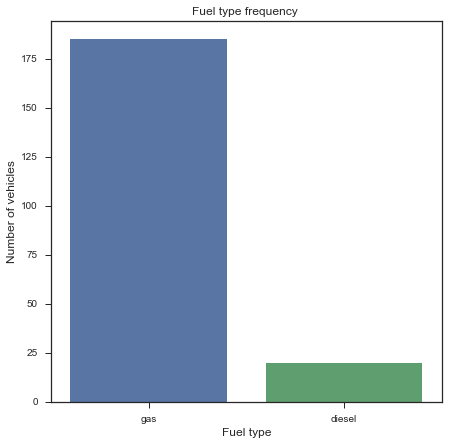

In [13]:
#Fuel type - frequency chart
f, axis = plt.subplots(figsize=(7, 7))
sns.countplot(x='fuel-type', data=auto)
plt.title("Fuel type frequency ")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')


**Inference:** *'Gas' is preferred by more than 80% of the customers than 'diesel'.*

### No. Of Doors - Bar Chart

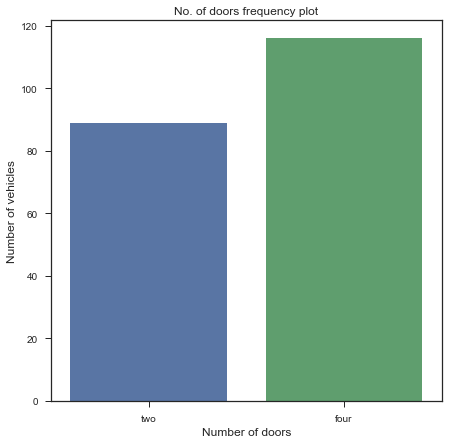

In [14]:
#No. Of Doors - Bar Chart
f, axis = plt.subplots(figsize=(7, 7))
sns.countplot(x='num-of-doors', data=auto)
plt.title("No. of doors frequency plot")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

**Inference:** *Even though there is not much difference, looks like 'four door vehicles' are popular among the customers.*

### Drive Wheels - Bar Chart

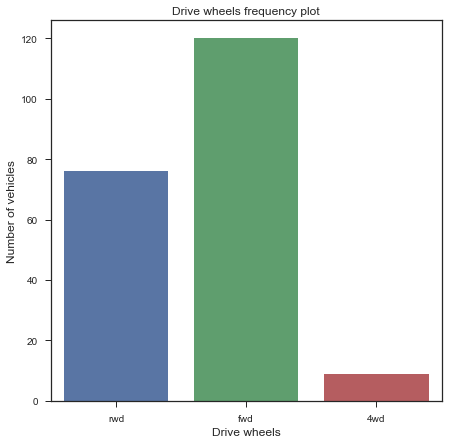

In [15]:
#Drive Wheel - Bar Chart
f, axis = plt.subplots(figsize=(7, 7))
sns.countplot(x='drive-wheels', data=auto)
plt.title("Drive wheels frequency plot")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

**Inference:** *'Front Wheen Drive (fwd)' has the most number of cars followed by 'rear wheel drive (rwd)' and 'four wheel drive (4wd)'.*

### Insurance Risk Rating - Histogram

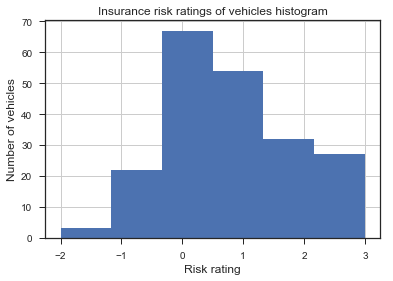

In [16]:
#Insurance Risk Rating - Histogram 
auto.symboling.hist(bins=6)
plt.title("Insurance risk ratings of vehicles histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

**Inference:** *Insurance Risk rating follows a normal distubution with most number of vehicles in the range of ratings 0 and 1.*

### Normalized Losses - Histogram

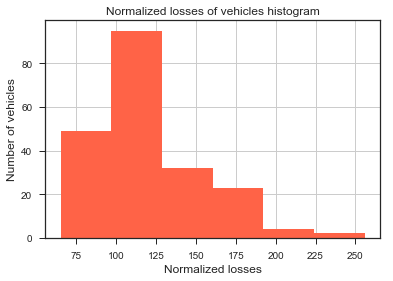

In [17]:
#Nomalized losses - Histogram
auto['normalized-losses'].hist(bins=6,color='tomato')
plt.title("Normalized losses of vehicles histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');


**Inference:** *Normalized losses (the average loss payment per insured vehicle year) has more number of cars in the range of 65 and 150.*

### Curb-Weight - Density Plot

Text(0.5,0,'Curb weight')

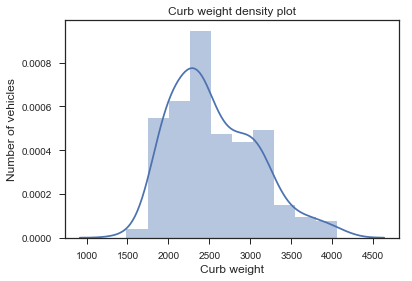

In [18]:
#Curb Weight - Density Plot
sns.distplot(auto['curb-weight'])
plt.title("Curb weight density plot")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

**Inference:** *Curb weight of the cars are distributed between 1500 and 4000 approx. The normal distibution in this case is slightly skewed to the right*

### Hosrpower - Histogram

Text(0.5,0,'Horsepower')

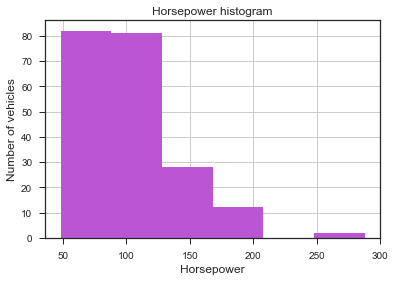

In [19]:
#Horse Power - Histogram
auto['horsepower'].hist(bins=6,color='mediumorchid')
plt.title("Horsepower histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horsepower')

**Inference:** *With regarding to the horsepower, most vehicles are in between 50 and 125.*

## Correlation Analysis

### Correlation matrix - Heat Map

Text(0.5,1,'Correlation Matrix - Heat Map')

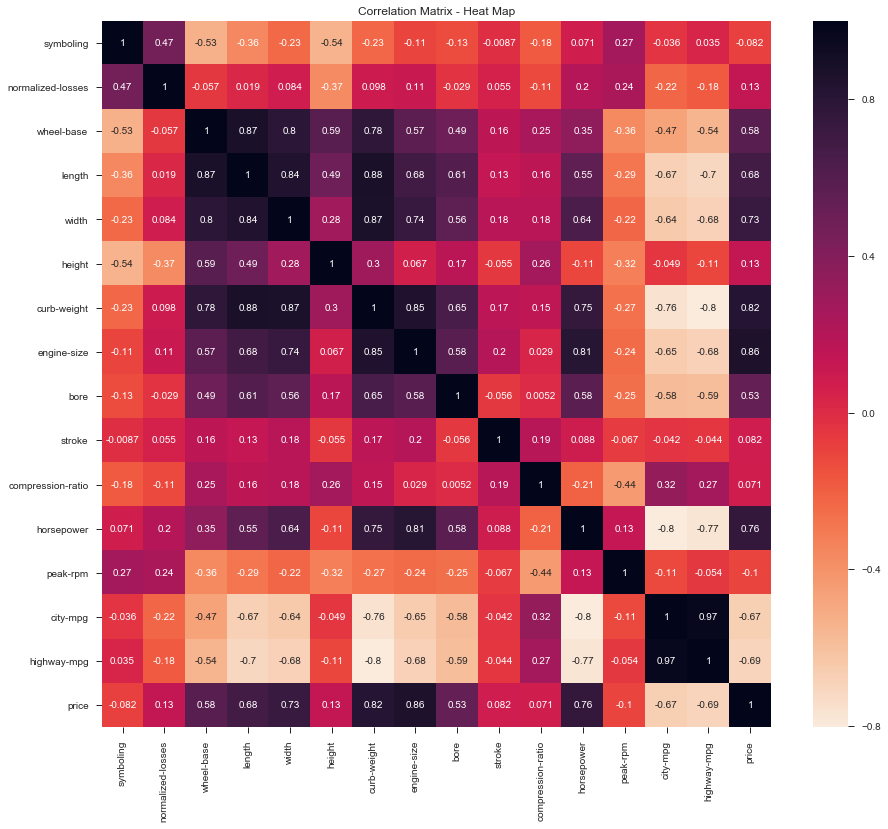

In [20]:
#Correlation analysis - Heat Map
plt.figure(figsize=(15,13))
sns.heatmap(auto.corr(),annot=True, cmap = 'rocket_r')
plt.title('Correlation Matrix - Heat Map')

**Inferences:**
- **price** is more correlated with **engine-size** and **curb-weight** among the other attributes. So, these two will be the **major predictors** in the model.
- **highway-mpg** is *highly correlated* with **city-mpg** with a correlation coefficient of 0.97. This can lead to severe **multicolliearity.** Since, these two variables are providing the same information for the model prediction, we can drop either one of these variables. 
- We can see that **curb-weight** have a *high correlation* with **engine-size**, **length**, **width** and **wheel-base** which is expected as these adds up to the weight of the car.
- Since, **wheel-base** of a car is determined by its **length** and **weight**, we can see the *high correlation* between these variables. 
- There is also a *high correlation* between **engine-size** and **horsepower**
- The target variable **price** has a stronger correlation with the following predictors,
    - engine-size
    - curb-weight
    - horsepower
    - city-mpg/highway-mpg
    - length/width


## Bivariate Analysis

### Price Vs Engine-size

Text(0.5,1,'Price Vs Engine-size')

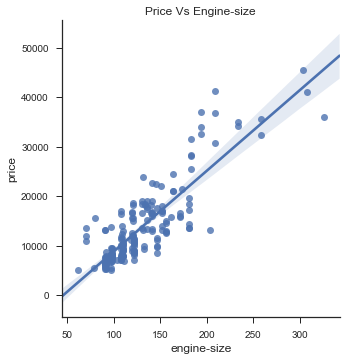

In [21]:
#Scatter plot - Price Vs Engine-size
sns.lmplot("engine-size",'price', auto)
plt.title("Price Vs Engine-size")

**Inference:** *Higher the engine-size is, costlier the vehicle is.*

### Curb-weight Vs City-mpg and Highway-mpg

Text(0.5,1,'Curb-weight Vs Highway-mpg')

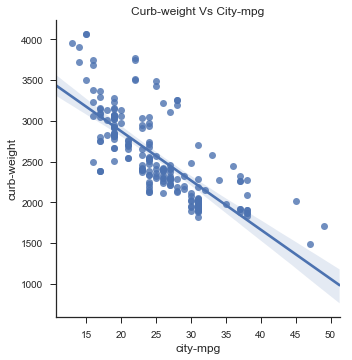

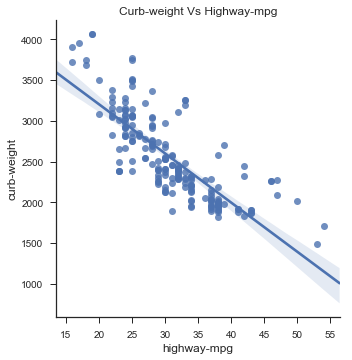

In [22]:
#Scatter plot - Curb-weight Vs City-mpg
sns.lmplot('city-mpg',"curb-weight", auto)
plt.title("Curb-weight Vs City-mpg")

#Scatter plot - Curb-weight Vs Highway-mpg
sns.lmplot('highway-mpg',"curb-weight", auto)
plt.title("Curb-weight Vs Highway-mpg")

**Inference:** *It is evident from the above plots that, 'city-mpg' and 'highway-mpg' have a negative correlation with the 'curb-weight'. It can be stated that, heavier vehicles give less mileage in both city and highway.*

### Price and Make - Box plot

Text(0.5,1,'Boxplot of Price and Make')

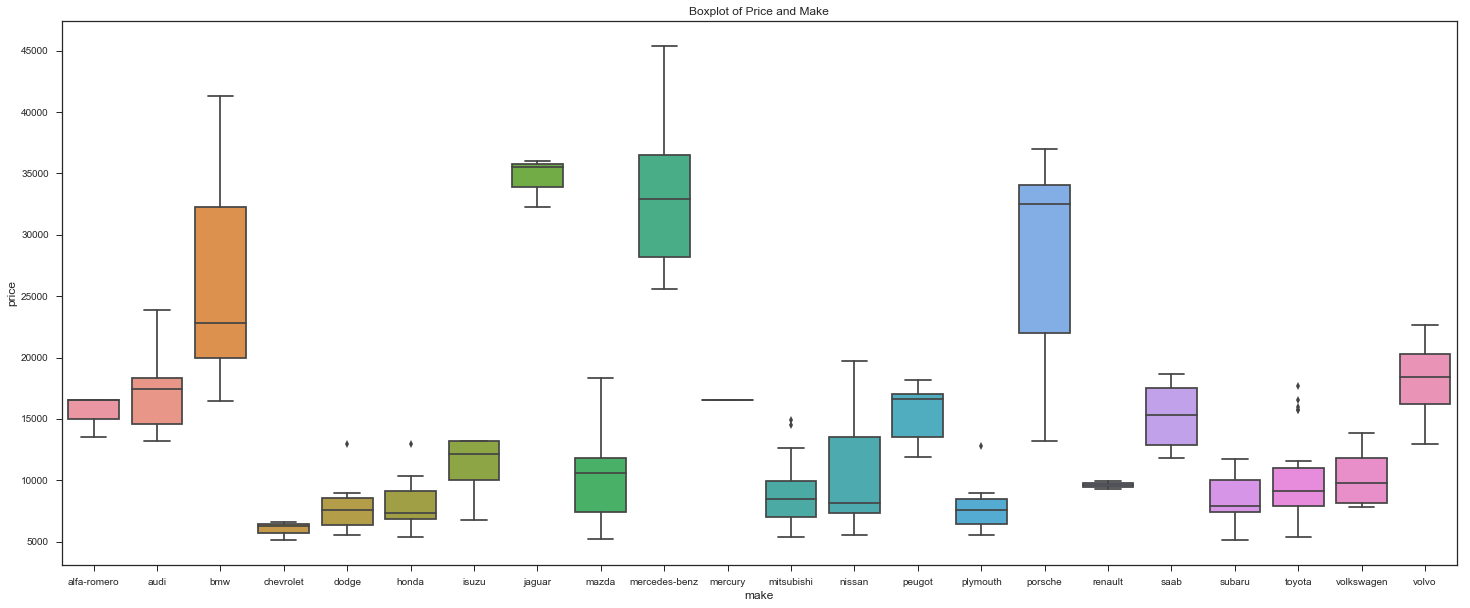

In [23]:
#Box-plot of Price and Make
plt.rcParams['figure.figsize']=(25,10)
ax = sns.boxplot(x="make", y="price", data=auto)
plt.title("Boxplot of Price and Make")

**Inferences:**
- The most expensive car is manufactured by **Mercedes-Benz**
- The lease expensive car is manufacture by **Chevrolet**
- BMW, Jaguar, Porsche and Mercedes-Benz are the manufaturers who make only **premium cars** in the high price range of above 20000.
- **least expensive affordable cars** in the price range of less than 10000 are manufatured by Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru.

### Price and Drive-Wheels - Box plot

Text(0.5,1,'Box-plot of Price and Drive-wheels')

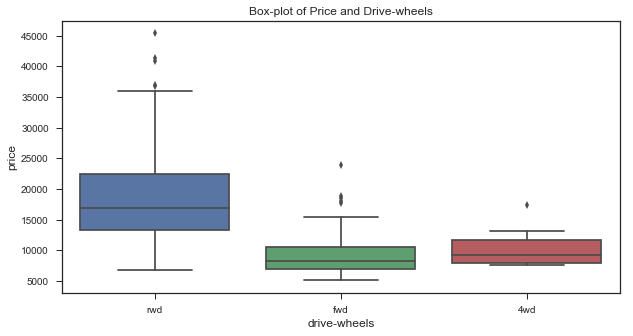

In [24]:
#Box-plot of Price and Drive-Wheels
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=auto)
plt.title("Box-plot of Price and Drive-wheels")

**Inference:** *From the above plot, it can be seen that 'rear wheel drive (rwd)' cars are the most expensive and the 'front wheel drive (fwd)' cars are the least expensive. *

### Conclusion

The above **EDA** helped us to understand and obtain some key insights of the **Automobile dataset**. These insights will be extremely helpful in buidling a suitable model for prediction.

The following are the steps done in this **EDA**:
- **Prelimiary step** - looking at the **structure** and **shape** of the data
- **Data Cleaning** - finding and **imputing** the missing values
- **Univariate Analysis**  - finding the **patterns** and **summarizing** the data through different attributes using *frequency, histogram* and *density plots.*
- **Correlation Analysis** - finiding the **nature of relationship** between the different features and also the *strong,* *weak* and *reduntant predictors* associated with the target variable
- **Bivariate Analysis** - finding and **analysing the relationship** between various pairs of features through *box-plot and scatter plot.* 